In [65]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, mean_squared_error


In [66]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Cogemos todas las filas y las dos primeras columnas
y = np.array(iris.target, dtype=int)

# Nombres de las filas y las columnas (de las cuales se van a seleccionar todas las filas (las samples o muestras) y solo dos columnas (las features o características)
feature_names = iris.feature_names
print("Features (características):", feature_names)
target_names = iris.target_names
print("Target (etiquetas de clase):", target_names)

print(X.shape) # Cantidad de muestras (filas) y características (columnas)
#print(iris['DESCR'])


Features (características): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target (etiquetas de clase): ['setosa' 'versicolor' 'virginica']
(150, 2)


In [67]:
# Proceso de entrenamiento usando .fit. Los kernel determinan cómo se relacionan las muestras entre sí en función de sus características.
kernel1 = 1.0 * RBF([1.0])
print(kernel1)
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel1).fit(X, y)  # Isotrópico: la escala de cada dimensión es la misma, lo que significa que todas las características tienen el mismo impacto en la similitud entre las muestras. 
kernel2 = 1.0 * RBF([1.0, 1.0])
print(kernel2)
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel2).fit(X, y)  # Anisotrópico: la escala de cada dimensión puede ser diferente, algunas características pueden tener más influencia que otras en la similitud entre las muestras.

# RBF es un modelo que intenta aprender la distribución de las clases en los datos de entrada (las características de las plantas) y clasificar nuevos puntos de datos en función de esa distribución aprendida.
# GaussianProcessClassifier es una clase en la biblioteca scikit-learn que implementa un clasificador basado en procesos gaussianos para problemas de clasificación.


1**2 * RBF(length_scale=1)
1**2 * RBF(length_scale=[1, 1])


In [68]:
# Añadimos los límites de los ejes x, y en la futura gráfica. 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # cogemos el valor mínimo y máximo de la primera característica (sepal lenght) y le restamos o sumamos 1.
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # cogemos el valor mínimo y máximo de la segunda característica (sepal width) y le restamos o sumamos 1.

h = 0.02  # Densidad de la "superficie" de la gráfica (o malla; cuanto más mayor sea, menor densidad)

# Meshgrid crea una malla bidimensionales (la matriz 'xx' tendrá las coordenadas x de todos los puntos y la matriz 'yy' tendrá las coordenadas de la y)
# np.arange se usa para generar los puntos de las coordenadas de las gráficas usando los límites que le pasamos (np.arange(start, stop, step) -> (stop - start / step)).
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


220
280
220
280


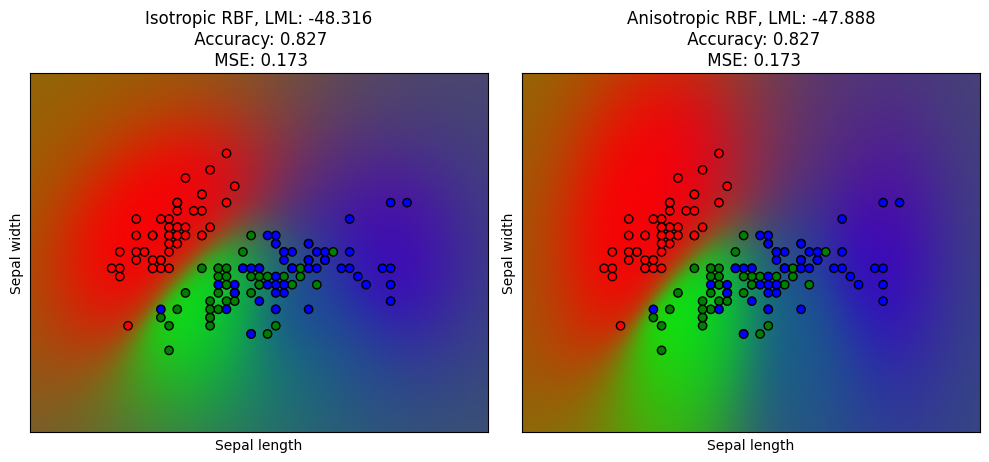

In [69]:
titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))

# Iteramos sobre los dos objetos (clasificadores) entrenados.
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    
    plt.subplot(1, 2, i + 1)
    
    # Se utiliza el clasificador actual (clf) para predecir las probabilidades para todos los puntos en la malla bidimensional ("aplanando" con .ravel).
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])   

    # "Reformatea" el objeto Z, estableciendo sus tres dimensiones
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    print(xx.shape[0])  # el número de filas. Cada fila corresponde a una coordenada en a lo largo del eje y.
    print(xx.shape[1])  # el número de columnas. Cada columna corresponde a una coordenada en a lo largo del eje x.
    
    # Plotea la imagen con las probabilidades que se han establecido en la predicción de Z (ejecutar hasta esta línea sin tener en cuenta las siguientes para verlo más claro)
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")
    
    # Hace un scatter con los datos de todas las filas (clases) y las dos primeras columnas (sepal lenght y sepal width). 
    # Cada clase en [y] se colorea con su color correspondiente (red->0, green->1, blue->2).
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y], edgecolors=(0, 0, 0))

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    accuracy = accuracy_score(y, clf.predict(X))
    mse = mean_squared_error(y, clf.predict(X))
    # Con MSE tomamos la diferencia entre cada valor predicho y su valor real, luego elevamos la diferencia al cuadrado y calculamos el promedio de la diferencia al cuadrado.
    
    plt.title(
        "%s, LML: %.3f\n Accuracy: %.3f\n MSE: %.3f" % (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta), accuracy, mse) 
        # Una LML (Verosimilitud Marginal Logarítmica) más alta indica un mejor ajuste del modelo a los datos observados.
        # Sin embargo, los valores numéricos de la LML no son inherentemente significativos. La importancia de estos valores radica en la comparación relativa entre diferentes modelos o configuraciones de modelo.
    )
plt.tight_layout()
plt.show()
    

<span style="font-size: 18px;">

GaussianProcessClassifier:

Modelado Probabilístico: El clasificador utiliza un modelo probabilístico para asignar una probabilidad a cada clase para una instancia de entrada dada. En lugar de solo predecir una clase, proporciona una distribución de probabilidad sobre todas las clases posibles.

Kernel de Covarianza: Utiliza un kernel de covarianza para modelar la relación entre las observaciones en el espacio de características. El kernel de covarianza es fundamental en los procesos gaussianos ya que determina cómo las observaciones se relacionan entre sí en función de sus características.

Aprendizaje Bayesiano: Se basa en el aprendizaje bayesiano para ajustar los hiperparámetros del modelo y realizar inferencias sobre los datos de entrenamiento. Esto significa que no solo proporciona predicciones puntuales, sino que también proporciona una medida de incertidumbre asociada con cada predicción.

Flexibilidad: Los procesos gaussianos son modelos no paramétricos, lo que significa que no hacen suposiciones específicas sobre la forma funcional de la relación entre las características y las etiquetas. Esto les otorga una gran flexibilidad para modelar relaciones complejas en los datos.
</span>